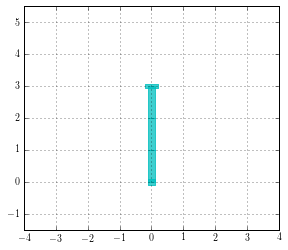

In [2]:
from mynotebooks import *
%matplotlib inline

nparts = 3
arm = Box2DWorld.Arm(position=(0,0), nparts=nparts, bHand=True)    # Box2DWorld.arm for the update in the animateWorld
fig, ax = Box2DWorld.makeFigure()

m = [0,0,0,0]
arm.gotoTargetJoints(m)
Box2DWorld.plotWorld(ax, color='c')
plt.show()

### Multiple Learning Functions with Explauto

##### Usual f(m)=s function,  f(s)=1, f(m)=1, f(dm)=alpha

In [3]:
import RobotLearning

m_mins = [-1.4]*(nparts+1)     # nparts joints plus the hand
m_maxs = [ 1.4]*(nparts+1)
s_mins = [ -3.0,  -1, -np.pi/2.0]
s_maxs = [ 3.0,  3.3, np.pi/2.0]

envFms = RobotLearning.RobotArmEnv(m_mins, m_maxs, s_mins, s_maxs)
#modelFms = SensorimotorModel.from_configuration(envFms.conf, 'ilo_gmm', 'default')
modelFms = SensorimotorModel.from_configuration(envFms.conf, 'nearest_neighbor', 'exact')

envFs = RobotLearning.RobotArmEnv(s_mins, s_maxs,[0],[1])
#modelFs = SensorimotorModel.from_configuration(envFs.conf, 'ilo_gmm', 'default')
modelFs = SensorimotorModel.from_configuration(envFs.conf, 'nearest_neighbor', 'exact')

envFm = RobotLearning.RobotArmEnv(m_mins, m_maxs,[0],[1])
#modelFm = SensorimotorModel.from_configuration(envFm.conf, 'ilo_gmm', 'default')
modelFm = SensorimotorModel.from_configuration(envFm.conf, 'nearest_neighbor', 'exact')

dm_mins = [-0.1]*(nparts+1)
dm_maxs = [0.1]*(nparts+1)
envFdm = RobotLearning.RobotArmEnv(dm_mins, dm_maxs,[0],[np.pi])
#modelFdm = SensorimotorModel.from_configuration(envFdm.conf, 'ilo_gmm', 'default')
modelFdm = SensorimotorModel.from_configuration(envFdm.conf, 'nearest_neighbor', 'exact')

envFsdm = RobotLearning.RobotArmEnv(dm_mins, dm_maxs,[0],[np.pi])
#modelFdm = SensorimotorModel.from_configuration(envFsdm.conf, 'ilo_gmm', 'default')
modelFsdm = SensorimotorModel.from_configuration(envFsdm.conf, 'nearest_neighbor', 'exact')

TypeError: __init__() got an unexpected keyword argument 'gravity'

## Sensorimotor learning with explauto

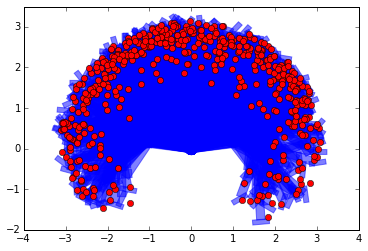

In [5]:
fig, ax = Box2DWorld.makeFigure()
#positions = []
r = m_maxs[0] - m_mins[0] 
dr =  dm_maxs[0] - dm_mins[0] 
for i in range(500):
    t = [r*num-r/2.0 for num in np.random.rand(nparts+1)]
    Box2DWorld.arm.gotoTargetJoints(t)    
    endpos = Box2DWorld.arm.getFinalPos()
    
    modelFms.update(t, endpos)
    modelFs.update(endpos,[1])
    modelFm.update(t,[1])

    dt = [dr*num-dr/2.0 for num in np.random.rand(nparts+1)]
    tdt = np.array(t)+np.array(dt)
    Box2DWorld.arm.gotoTargetJoints(tdt)    
    newendpos = Box2DWorld.arm.getFinalPos()
    vs = np.array(newendpos[0:-1])-np.array(endpos[0:-1])    
    alpha = Box2DWorld.vangle([1,0],vs)
    
    modelFdm.update(dt,[alpha])
    
    
    # Plotting
    Box2DWorld.plotWorld(ax)
    pos = endpos[0:-1]
    ax.plot(*pos, marker='o', color='red')

### Forward prediction test

In [2]:
r = m_maxs[0] - m_mins[0] 
t = [r*num-r/2.0 for num in np.random.rand(nparts+1)]

Box2DWorld.arm.gotoTargetJoints(t)    
endpos = Box2DWorld.arm.getFinalPos()
pos_pred = modelFms.forward_prediction(t)

fig, ax = Box2DWorld.makeFigureWorld(pos=pos_pred[0:-1],angle=pos_pred[-1])

dt = [-0.2]*4
print modelFdm.forward_prediction(dt)

#modelFs.forward_prediction([-400,0,100]) # always [1] because no [0] instances unreacheble 
#modelFs.forward_prediction(endpos)

print "Fm inverse prediction t  : ", modelFm.forward_prediction(t)
print "Fs inverse prediction [1]: ", modelFs.inverse_prediction([1])
#modelFm.inverse_prediction([1])

Box2DWorld.arm.gotoTargetJoints(np.array(t) + np.array(dt))   
Box2DWorld.plotWorld(ax, color='c')



NameError: name 'm_maxs' is not defined